# _`expression`_.`derivation(`_`label`_`, `_`breaking`_`=False)`

Compute the derivation of a weighted expression.

Arguments:
- `label`: the (non empty) string to derive the expression with.
- `breaking`: whether to split the result.

See also:
- [_expression_.derived_term](expression.derived_term.ipynb)
- [_expression_.expansion](expression.expansion.ipynb)
- [_polynomial_.split](polynomial.split.ipynb)

References:
- [lombardy.2005.tcs](References.ipynb#lombardy.2005.tcs) defines the derivation
- [angrand.2010.jalc](References.ipynb#angrand.2010.jalc) defines the breaking derivation

## Examples

The following function will prove handy: it takes a rational expression and a list of strings, and returns a $\LaTeX$ `aligned` environment to display nicely the result.

In [1]:
import vcsn
from IPython.display import Latex

def diffs(e, ws):
    eqs = []
    for w in ws:
        w = e.context().word(w)
        eqs.append(r'\frac{{\partial}}{{\partial {0:x}}} {1:x}& = {2:x}'
                   .format(w, e, e.derivation(w)))
    return Latex(r'''\begin{{aligned}}
        {0}
    \end{{aligned}}'''.format(r'\\'.join(eqs)))

### Classical expressions

In the classical case (labels are letters, and weights are Boolean), this is the construct as described by Antimirov.

In [2]:
b = vcsn.context('[ab]')
e = b.expression('[ab]{3}')
e.derivation('a')

(a+b){2}

Or, using the `diffs` function we defined above:

In [3]:
diffs(e, ['a', 'aa', 'aaa', 'aaaa'])

<IPython.core.display.Latex object>

### Weighted Expressions

Of course, expressions can be weighted.

In [4]:
q = vcsn.context('lal(abc), q')
e = q.expression('(<1/6>a*+<1/3>b*)*')
diffs(e, ['a', 'aa', 'ab', 'b', 'ba', 'bb'])

<IPython.core.display.Latex object>

And this is tightly connected with the construction of the derived-term automaton.

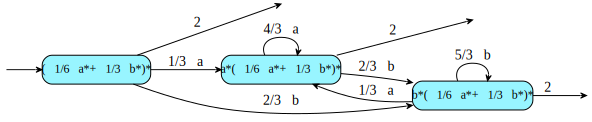

In [5]:
e.derived_term()

### Multitape expressions
It is possible to compute the derivatives of a multitape expression.

In [6]:
c = vcsn.context('lat<lal(ab), lal(xy)>, q')
exp = c.expression
c

[ab]? x [xy]? -> Q

In [7]:
e = exp('(a{+}|x + b{+}|y)*')

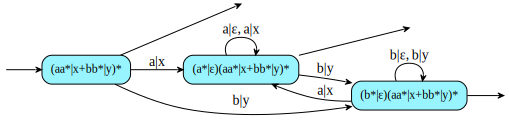

In [8]:
e.derived_term()

The following expressions corresponds to the second state of the above automaton (reached from the initial state via $a|x$).

In [9]:
f = exp(r'a*|\e') * e
f

(a*|\e)(aa*|x+bb*|y)*

In [10]:
diffs(f, [r'\e|x', r'\e|y', r'a|\e', r'b|\e'])

<IPython.core.display.Latex object>

In [11]:
diffs(e, ['a|x', 'a|y', 'b|x', 'b|y'])

<IPython.core.display.Latex object>

### Breaking derivation

The "breaking" derivation "splits" the polynomial at the end.

In [12]:
e = q.expression('[ab](<2>[ab])', 'associative')
e

(a+b)<2>(a+b)

In [13]:
e.derivation('a')

<2>(a+b)

In [14]:
e.derivation('a', True)

<2>a + <2>b

In [15]:
e.derivation('a').split()

<2>a + <2>b

Again, this is tightly connected with both flavors of the derived-term automaton.

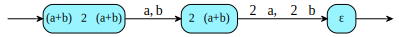

In [16]:
e.derived_term()

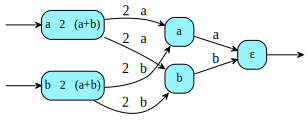

In [17]:
e.derived_term('breaking_derivation')